# Lab 03

In this lab, we will first create a dataset for Linear regression, then build different methods to solve simple linear regression.

We will go from generating synthetic data to optimizing the parameters of our model and plotting the results.

## Exercise 1

Build a class to generate data sampled from 2D lines:
- $y = ax + b + Eps$
- the noise Eps is Normal centered on 0, with a parameterized variance.
- $x_i$ is in the range \[-10 , 10\].

This class should allow you to generate any number of points.

Build a  method that allow you to generate training, and testing datasets:
- the method takes as input thenumber of points generated, and the ratio of points between training and testing set (between 0 and 1).

Finally, implement a method that allows to display:
- the dataset points 
- the actual line that was used to generate the points
- optional line parameters to display the predicted line


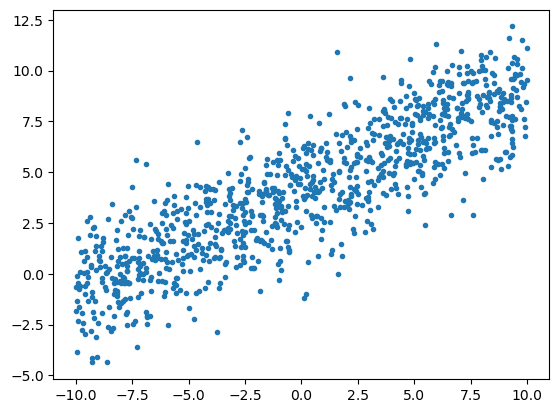

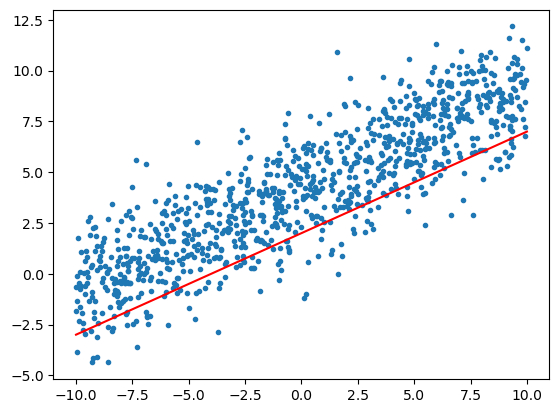

In [1]:
import numpy as np
import math
from numpy.random import default_rng
rng = default_rng()

import matplotlib.pyplot as plt

class Line2D:
    
    def __init__( self, a, b, noise_variance = 1 ):
        
        self.a = a
        self.b = b
        self.variance = noise_variance
        
    def generate_points(self, N):

        # Generate random X
        X = rng.uniform(-10, 10, N)
        
        # Generate random noise
        epsilon = rng.normal(0, math.sqrt(self.variance), N)
        
        # Calculate corresponding y
        y = self.a * X + self.b + epsilon
                
        return X, y
        
    def generate_dataset(self, N, ratio_train = 0.6):
        
        X_train , y_train = self.generate_points( int(N*ratio_train) )
        X_test , y_test = self.generate_points( N - int(N*ratio_train) )
        
        return (X_train, y_train), (X_test, y_test)
    
    def plot( self, X, y, predicted_a = None, predicted_b = None):
        
        plt.scatter(X, y, marker='.')

        x_start = -10
        x_end = 10

        if predicted_a and predicted_b:
          y_start = -10*predicted_a + predicted_b
          y_end = 10 * predicted_a + predicted_b
          plt.plot( (x_start, x_end), (y_start, y_end), 'r')
        plt.show()
        

data = Line2D( 0.5, 4, noise_variance= 3 )
X_vis, y_vis = data.generate_points(1000)
data.plot(X_vis, y_vis)
data.plot(X_vis, y_vis, predicted_a = 0.5, predicted_b = 2)

## Exercise 2

Now, we will solve Linear Regression using the different methods we saw during the Lecture.

First of all, we will build an Class that will define how all Linear Regression subclasses behave.
Some methods are common to all subclasses that we will implement.

We will evaluate all our methods using the Mean Square Error.
Why this instead of total sum of square?

In [ ]:
class LinearRegression:

    def __init__(self):
        
        self.estimated_a = 0
        self.estimated_b = 0
        
    def cost(self, X, y):
        y_pred = self.predict(X)
        calculated_cost = np.sum( (y_pred - y)**2)
        return calculated_cost
        
    def predict(self, X):
        y_pred = X * self.estimated_a + self.estimated_b
        return y_pred
    
    def evaluate(self, X_test, y_test):
        
        # Total Sum of Squares
        SS_tot = self.cost(X_test, y_test)
        
        # Mean squares
        MSE = SS_tot/len(X_test)
        
        return MSE

Now that the Linear regression class is defined, we can create different subclasses that implement the appraoches we saw during the Lecture.

You need to implement the fit method that will update the estimated parameters.

In [ ]:
class RandomSearch(LinearRegression):
    
    def __init__(self, **kwargs):

      super().__init__(**kwargs)

      self.cost_history = []

    def fit(self, X, y, n_steps):

      best_a = self.estimated_a
      best_b = self.estimated_b

      for step in range(n_steps):
        # generate random estimated_a and estimated_b through uniform distribution, range -10 to 10
        self.estimated_a = ...
        self.estimated_b = ...

        cost = ...
        self.cost_history.append(cost)

        if min(self.cost_history) == cost:
          # update best_a and best_b
          pass

      self.estimated_a = best_a
      self.estimated_b = best_b
        
X_train, y_train = data.generate_points(10000)

rs = RandomSearch()
rs.fit(X_train, y_train, 10000)

X_test, y_test = data.generate_points(1000)
print(rs.estimated_a, rs.estimated_b)
print(rs.evaluate(X_test, y_test))

In [ ]:
class GradientDescent(LinearRegression):
    
    def __init__(self, learning_rate):
        
        super().__init__()
        self.lr = learning_rate

    def fit(self, X, y, number_epochs ):
        
        cost_history = []
        
        for epoch in range(number_epochs):
            
            sum_x = np.sum(X)
            sum_y = np.sum(y)
            sum_xy = np.sum(X*y)
            sum_x_2 = np.sum(X*X)
            
            gradient_a = ...
            gradient_b = ...
            
            # update both parameters 
            self.estimated_a -= ...
            self.estimated_b -= ...
            
            cost = self.cost(X, y)
            cost_history.append(cost)
            
            if epoch%10 == 0:
              print(epoch, cost)
            
        return cost_history
    
X_train, y_train = data.generate_points(10000)
gd = GradientDescent(0.01)
gd.fit(X_train, y_train, 1000)

X_test, y_test = data.generate_points(1000)
print(gd.estimated_a, gd.estimated_b)
print(gd.evaluate(X_test, y_test))

## Exercise 3
For random search and gradient descent, display regression lines in each epoch through the learned parameters (estimated_a, estimated_b) 

## Exercise 4

Solve the linear regression problem for different values of line parameters.

Compare the speed of convergence of different approaches depending on the learning rate.

What happens if the learning rate is too high?



## Exercise 5

Use scikit-learn to verify that you obtain similar results.

In [ ]:
from sklearn import linear_model

X_train, y_train = data.generate_points(10000)

reg = linear_model.LinearRegression()
...
